In [1]:
from matplotlib import pyplot as plt
from whar_datasets import (
    get_dataset_cfg,
    WHARDatasetID,
    PostProcessingPipeline,
    PreProcessingPipeline,
    Loader,
    LOSOSplitter,
    KFoldSplitter,
    LGSOSplitter,
)

In [2]:
cfg = get_dataset_cfg(WHARDatasetID.WISDM)

cfg.parallelize = True
cfg.in_memory = True
force_recompute = False
force_recompute = [False, True, True]

In [3]:
pre_pipeline = PreProcessingPipeline(cfg)
activity_df, session_df, window_df = pre_pipeline.run(force_recompute)

2026-01-08 09:34:13,802 - whar-datasets - INFO - Running DownloadingStep
2026-01-08 09:34:13,803 - whar-datasets - INFO - Checking hash for DownloadingStep
2026-01-08 09:34:13,805 - whar-datasets - INFO - Hash is up to date
2026-01-08 09:34:13,805 - whar-datasets - INFO - Forcing recompute
2026-01-08 09:34:13,806 - whar-datasets - INFO - Running ParsingStep
2026-01-08 09:34:13,807 - whar-datasets - INFO - Checking hash for ParsingStep
2026-01-08 09:34:13,808 - whar-datasets - INFO - Hash is up to date
2026-01-08 09:34:13,809 - whar-datasets - INFO - Checking download
2026-01-08 09:34:13,809 - whar-datasets - INFO - Download exists
2026-01-08 09:34:13,809 - whar-datasets - INFO - Parsing to common format
Creating sessions: 100%|██████████| 403/403 [00:01<00:00, 275.98it/s]
2026-01-08 09:34:19,096 - whar-datasets - INFO - Saving common format
2026-01-08 09:34:19,263 - whar-datasets - INFO - Forcing recompute
2026-01-08 09:34:19,263 - whar-datasets - INFO - Running WindowingStep
2026-01-0

[########################################] | 100% Completed | 1.78 sms


2026-01-08 09:34:21,352 - whar-datasets - INFO - Common format validated.
2026-01-08 09:34:21,353 - whar-datasets - INFO - Compute windowing
2026-01-08 09:34:21,353 - whar-datasets - INFO - Selecting activities
2026-01-08 09:34:21,357 - whar-datasets - INFO - Processing sessions (parallelized)


[########################################] | 100% Completed | 8.75 sms


2026-01-08 09:34:30,357 - whar-datasets - INFO - Saving windowing
2026-01-08 09:34:33,061 - whar-datasets - INFO - Loading windowing
2026-01-08 09:34:33,072 - whar-datasets - INFO - activity_ids from 0 to 5
2026-01-08 09:34:33,075 - whar-datasets - INFO - subject_ids from 0 to 35


In [4]:
# splitter = LOSOSplitter(cfg)
# splitter = LGSOSplitter(cfg)
splitter = KFoldSplitter(cfg)

splits = splitter.get_splits(session_df, window_df)
for split in splits:
    print(
        split.identifier,
        len(split.train_indices),
        len(split.val_indices),
        len(split.test_indices),
    )

fold_0 16134 4033 2241
fold_1 16134 4033 2241
fold_2 16134 4033 2241
fold_3 16134 4033 2241
fold_4 16134 4033 2241
fold_5 16134 4033 2241
fold_6 16134 4033 2241
fold_7 16134 4033 2241
fold_8 16135 4033 2240
fold_9 16135 4033 2240


In [5]:
post_pipeline = PostProcessingPipeline(
    cfg, pre_pipeline, window_df, splits[0].train_indices
)
samples = post_pipeline.run(True)

2026-01-08 09:34:33,123 - whar-datasets - INFO - Forcing recompute
2026-01-08 09:34:33,124 - whar-datasets - INFO - Running SamplingStep
2026-01-08 09:34:33,124 - whar-datasets - INFO - Checking hash for SamplingStep
2026-01-08 09:34:33,126 - whar-datasets - INFO - Hash is up to date
2026-01-08 09:34:34,850 - whar-datasets - INFO - Computing samples
2026-01-08 09:34:34,850 - whar-datasets - INFO - Getting normalization parameters
2026-01-08 09:34:35,041 - whar-datasets - INFO - Normalizing and transforming windows (parallelized)


[########################################] | 100% Completed | 7.55 sms


2026-01-08 09:34:42,863 - whar-datasets - INFO - Saving samples
2026-01-08 09:34:42,979 - whar-datasets - INFO - Loading samples


In [6]:
loader = Loader(session_df, window_df, post_pipeline.samples_dir, samples)

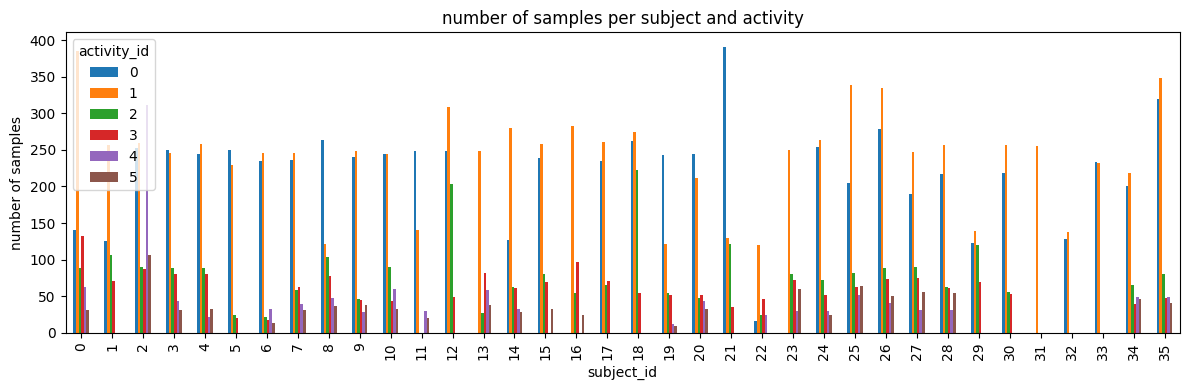

In [7]:
len(loader)
loader.plot_indices_statistics(list(range(len(loader))))

Text(0.5, 1.0, ' Activity: 3, Subject: 2')

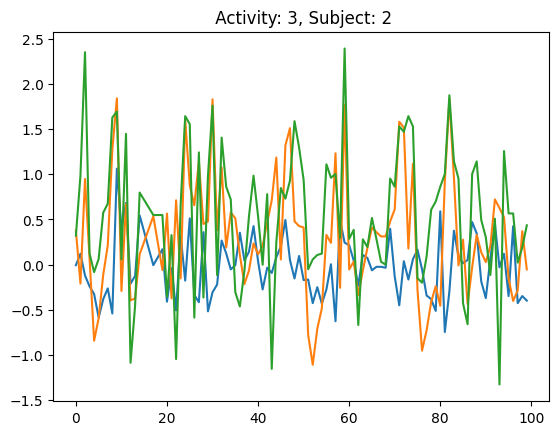

In [10]:
subject_id = 2
activity_id = 3

# index as ra
ya, ys, (x,) = loader.sample_items(1, activity_id=activity_id, subject_id=subject_id)
ya_single = ya[0]
ys_single = ys[0]
x_single = x[0]

plt.plot(x_single)
plt.title(f" Activity: {ya_single}, Subject: {ys_single}")